---
## Homework 12 - Model Validation and Feature Engineeriing 
---


In [1]:
import numpy as np 
from scipy import stats
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pylab as plt 
import numpy.linalg as npl
%matplotlib inline

### Problem 1:  

**PART A:** Parker has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a least squares model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Execute the two cells below to load the data into a Pandas DataFrame.


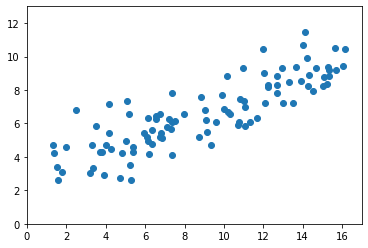

In [8]:
# file generation code:
np.random.seed(3022)

astar = 3
bstar = 0.4
sigma = 1

n = 100
runs = stats.uniform.rvs(loc=1.2345, scale=15, size=n)
scoops = astar + bstar*runs + stats.norm.rvs(loc=0, scale=sigma, size=n)

plt.scatter(runs, scoops)
plt.xlim([0,17])
plt.ylim([0,13])
plt.show()

dfIce = pd.DataFrame(data={'miles':runs, 'scoops':scoops})
dfIce.to_csv("icecream.csv", index=False)

In [9]:
dfTreats = pd.read_csv("icecream.csv")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**PART B:** Perform a simple linear regression (least squares fit) with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python.

In [10]:
from sklearn.linear_model import LinearRegression
X = dfTreats.iloc[:, :-1].values
Y = dfTreats.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regression = LinearRegression()
regression.fit(X_train, y_train)

a = regression.intercept_
B = regression.coef_

print('y=', a, '+',B,'x')

y= 3.009197015186295 + [0.4170176] x


**PART C:** Compute the RMS error of your model from **PART B**.

In [11]:
actual = y_test
y_pred = regression.predict(X_test)
predicted = y_pred

print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.9864065816996759


**PART D:** Use the code cell below to randomly draw a test set. In **Part E**, you will be performing an out-of-sample validation of your model.

In [12]:
np.random.seed(2820)
data = list(zip(dfTreats["miles"],dfTreats["scoops"]))

np.random.shuffle(data)
training_dataset, test_dataset = sklearn.model_selection.train_test_split(data, train_size=90, test_size=10)

feature_test = []
y_test = []
for ii in range(len(test_dataset)):
    feature_test.append(test_dataset[ii][0])
    y_test.append(test_dataset[ii][1])
    
feature_train = []
y_train = []
for ii in range(len(training_dataset)):
    feature_train.append(training_dataset[ii][0])
    y_train.append(training_dataset[ii][1])
    
test_dict = {"miles":feature_test, "scoops":y_test}
train_dict = {"miles":feature_train, "scoops":y_train}

dfTestSet = pd.DataFrame(data=test_dict)
dfTrainingSet = pd.DataFrame(data=train_dict)

In [14]:
dfTestSet.head()

,miles,scoops
0,7.368346,7.813114
1,10.000334,6.893307
2,5.098861,7.318355
3,6.137674,6.307874
4,1.577379,2.608175


In [15]:
dfTrainingSet.head()

,miles,scoops
0,6.327682,5.603935
1,14.257663,8.259234
2,3.181743,3.055331
3,15.088920,8.774816
4,1.771091,3.110615


**PART E:** 
- Use out-of-sample validation to first fit a least squares fit to your training data. Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.


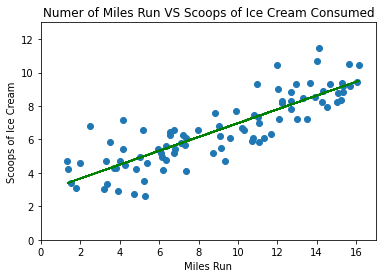

[2.83894338 0.41323912]


In [ ]:
n = len(dfTrainingSet)
A = np.stack((np.ones(n),dfTrainingSet["miles"]), axis=1)
x = np.linalg.lstsq(A, dfTrainingSet["scoops"], rcond=None)[0]
plt.scatter(dfTrainingSet["miles"], dfTrainingSet["scoops"])

plt.plot(dfTrainingSet["miles"], np.dot(A,x), color='green')

plt.xlim([0,17])
plt.ylim([0,13])
plt.xlabel("Miles Run")
plt.ylabel("Scoops of Ice Cream")
plt.title("Numer of Miles Run VS Scoops of Ice Cream Consumed")
plt.show()

print(x)

**PART F:** Compute the RMS prediction error for the training data set AND the test data set.
- Compare the RMS values, and comment on whether you think your model is a good model and whether or not you think it has good generalization ability.

In [ ]:
# RMS for training set
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_train, feature_train)))

Root Mean Squared Error: 3.6969132137933656


In [ ]:
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, feature_test)))

Root Mean Squared Error: 2.0495847295233633


This modle is fairly accurate but it does not have good gerneralization ability as it is overfitting.

### Problem 2:  

**PART A:** A randomized control study was performed with $18$ subjects to investigate the effect of exercise and diet on weight loss.  All $18$ subjects of the study exercised on a daily basis, one third of the subjects ate their regular diet, one third of subjects ate based on Diet $A$, and one third of subjects ate based on Diet $B$.  The observed weight loss after one week is summarized in the following data. 

In [31]:
dfA = pd.DataFrame({"Control": np.array([4,8,7,5,1,5]),"Diet A": np.array([5,4,4,3,9,4]),"Diet B": np.array([9,8,8,10,5,10])})
dfA.head(10)

,Control,Diet A,Diet B
0,4,5,9
1,8,4,8
2,7,4,8
3,5,3,10
4,1,9,5
5,5,4,10


**PART B:** Using python, set up a design matrix to expand this categorical problem with 3 values using 2 features.

In [34]:
y = dfA.values.T.flatten()

dct = {"loss": y}

counts = [dfA[col].count() for col in dfA.columns]

ccf = [int(np.sum(counts[i])) for i in range(1,len(counts))] + [len(y)]


for i in range(1,dfA.shape[1]):
    x = np.zeros(len(y))
    x[ccf[i-1]:ccf[i]] = 1  
    dct[dfA.columns[i]] = x 

dfR = pd.DataFrame(dct)

print(dfR)

    loss  Diet A  Diet B
0      4     0.0     0.0
1      8     0.0     0.0
2      7     0.0     0.0
3      5     0.0     0.0
4      1     0.0     0.0
5      5     0.0     0.0
6      5     0.0     1.0
7      4     0.0     1.0
8      4     0.0     1.0
9      3     0.0     1.0
10     9     0.0     1.0
11     4     0.0     1.0
12     9     0.0     1.0
13     8     0.0     1.0
14     8     0.0     1.0
15    10     0.0     1.0
16     5     0.0     1.0
17    10     0.0     1.0


**PART C:** Use python to fit a linear regression where the features are binary categorical variables associated with group membership.

In [36]:
y = dfR.loc[:,"loss"]
X = dfR.loc[:,["Diet A", "Diet B"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.501
Date:                Sat, 23 Apr 2022   Prob (F-statistic):              0.238
Time:                        00:51:18   Log-Likelihood:                -41.576
No. Observations:                  18   AIC:                             87.15
Df Residuals:                      16   BIC:                             88.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000      1.055      4.738      0.000       2.763       7.237
Diet A              0          0        nan        nan           0           0
Diet B         1.5833      1.293      1.225      0.238      -1.157       4.323
==============================================================================
Omnibus:                        5.001   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                1.499
Skew:                          -0.084   Prob(JB):                        0.473
Kurtosis:                       1.596   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**PART D:** Briefly summarize your model. Do you think one diet yields more weightloss than another? Do either of the diets yield a significant amount more weightloss than the control group?

Diet B yeilds more weightloss than diet A. Diet B yeilds slightly more wieght loss than the control while Diet A is about the same as the control 